In [ ]:
scaling & encoding - both regression & classification

In [ ]:
yes/no - true/false - default/no default - 0/1 - 0/1/2/3/4/5 - classification

sales - stock prices - temperatures - 0/1/2/3/..../100 - regression 

# Random Forest in Machine Learning

![](https://static.javatpoint.com/tutorial/machine-learning/images/random-forest-algorithm.png)

## Load the Data

In [226]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
od.download('https://www.kaggle.com/datasets/yasserh/walmart-dataset')

100%|███████████████████████████████████████████| 122k/122k [00:00<00:00, 166kB/s]

In [227]:
df = pd.read_csv('walmart-dataset/Walmart.csv')

In [228]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


## Clean the Data

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


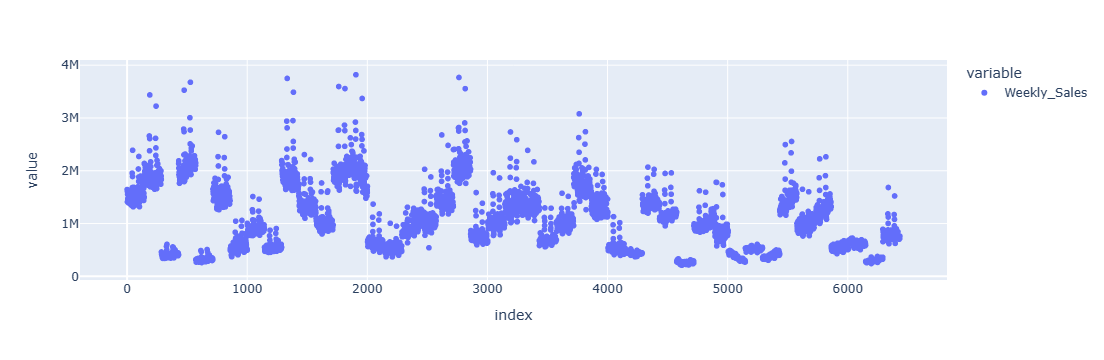

In [230]:
px.scatter(df['Weekly_Sales'])

In [233]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [235]:
df_without_outlier = df[df['Weekly_Sales']<3000000]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [236]:
df.corr()

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_44689/1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


## Feature Engineering

Feature engineering is the process of transforming raw data into a format that is more suitable for machine learning models, allowing them to perform better. It involves creating new features, selecting relevant ones, and transforming existing features to improve the overall performance of a model. Effective feature engineering can lead to improved model accuracy, interpretability, and generalization. Here are some common techniques and considerations in feature engineering:


1. **Derived Features:**
   - Create new features that might provide more information to the model, such as ratios, differences, or polynomial features.

2. **Handling Dates and Times:**
   - Extract relevant information from date and time features, such as day of the week, month, or time intervals. This can be useful for capturing temporal patterns.


The choice of feature engineering techniques depends on the nature of the data and the specific requirements of the machine learning task. It often involves an iterative process of experimentation and evaluation to determine which features contribute most effectively to the model's performance.

For example, here are some features that can be extracted from the "Date" column:

1. Day of week
2. Day or month
3. Month
4. Year
5. Weekend/Weekday
6. Month/Quarter End

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [238]:
df['Date'] = pd.to_datetime(df['Date'])

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_44689/2394721818.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [243]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [242]:
df.Date.dt.year

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
6430    2012
6431    2012
6432    2012
6433    2012
6434    2012
Name: Date, Length: 6435, dtype: int64

In [244]:
df['Day'] = df.Date.dt.day
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year

In [245]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [247]:
df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [248]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,WeekOfYear
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010,18
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012,39
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012,19
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012,50
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012,42


In [249]:
df.corr()

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_44689/1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,WeekOfYear
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,-1.070464e-15,6.289676e-16,3.474318e-12,1.038488e-15
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-1.487292e-02,6.753523e-02,-1.837754e-02,6.610484e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,-3.603594e-02,3.322341e-01,-5.678257e-02,3.288032e-01
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,8.901925e-02,6.643970e-02,6.426923e-02,7.318701e-02
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,3.253169e-02,-5.283174e-02,7.794703e-01,-4.193804e-02
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,3.965821e-03,1.478843e-03,7.479573e-02,2.782979e-03
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-8.166853e-03,-2.061552e-03,-2.418135e-01,-6.038021e-03
Day,-1.070464e-15,-0.014873,-3.603594e-02,0.089019,0.032532,0.003966,-0.008167,1.000000e+00,5.959249e-03,-1.277942e-02,8.748473e-02
Month,6.289676e-16,0.067535,3.322341e-01,0.066440,-0.052832,0.001479,-0.002062,5.959249e-03,1.000000e+00,-1.390145e-01,9.964777e-01
Year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,-1.277942e-02,-1.390145e-01,1.000000e+00,-1.269874e-01


## Split the Data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year',
       'WeekOfYear'],
      dtype='object')

In [250]:
#df.columns[1:-1]

In [20]:
inputs = list(df[['Store', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year',
       'WeekOfYear']].columns)

In [28]:
target = 'Weekly_Sales'

In [253]:
#df

In [31]:
train_val_df, test_df = train_test_split(df[['Store', 'Holiday_Flag', 'Temperature', 'Weekly_Sales',
       'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year',
       'WeekOfYear']], test_size=0.2, random_state=42)

In [32]:
train_df, val_df = train_test_split(train_val_df,test_size=0.25,random_state=42)

In [40]:
train_inputs = train_df[inputs]
train_target = train_df[target]

In [41]:
val_inputs = val_df[inputs]
val_target = val_df[target]

In [42]:
test_inputs = test_df[inputs]
test_target = test_df[target]

## Preprocess the Data

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Day           6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Year          6435 non-null   int64         
 11  WeekOfYear    6435 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(5), int64(5)
memory usage: 584.6 KB


In [254]:
from sklearn.preprocessing import StandardScaler

In [255]:
numerics = list(df[inputs].select_dtypes(np.number).columns)

In [256]:
numerics

['Store',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'Day',
 'Month',
 'Year',
 'WeekOfYear']

In [257]:
scaler = StandardScaler()

In [258]:
scaler.fit(df[numerics])

StandardScaler()

In [259]:
train_inputs[numerics] = scaler.transform(train_inputs[numerics])
val_inputs[numerics] = scaler.transform(val_inputs[numerics])
test_inputs[numerics] = scaler.transform(test_inputs[numerics])

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_44689/4072025852.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [260]:
train_inputs[numerics].describe()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,WeekOfYear
count,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000,3861.000000
mean,-1.904398,-0.357830,-3.465705,-21.131257,-4.470409,-6.425876,-1.985769,-2.491545,-5688.704206,-1.912944
std,0.001739,3.777030,0.000533,1.083795,0.000251,0.051130,0.003788,0.027277,0.625515,0.001346
min,-1.907342,-1.349392,-3.467506,-23.260259,-4.470698,-6.538055,-1.992214,-2.536499,-5689.473694,-1.915266
25%,-1.905860,-1.349392,-3.466088,-22.149650,-4.470662,-6.456008,-1.989168,-2.511779,-5689.473694,-1.914055
50%,-1.904377,-1.349392,-3.465634,-20.886837,-4.470337,-6.429286,-1.985688,-2.495299,-5688.686468,-1.912938
75%,-1.902895,-1.349392,-3.465297,-20.256620,-4.470144,-6.408856,-1.982643,-2.470579,-5687.899241,-1.911820
max,-1.901413,14.025796,-3.464593,-18.513416,-4.470052,-6.253834,-1.979162,-2.445859,-5687.899241,-1.910517


### Linear Regression

## Fit the Data

In [261]:
from sklearn.linear_model import LinearRegression

In [262]:
lin_model = LinearRegression()

In [263]:
lin_model.fit(train_inputs[numerics], train_target)

LinearRegression()

In [264]:
train_preds = lin_model.predict(train_inputs[numerics])

In [265]:
val_preds = lin_model.predict(val_inputs[numerics])

### Evaluate the Model

In [266]:
from sklearn.metrics import mean_squared_error as mse

In [267]:
mse(train_target, train_preds,squared=False)

521455.1245004566

In [268]:
mse(val_target, val_preds,squared=False)

519684.6745290611

In [270]:
df['Weekly_Sales'].describe()

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

### Decision Tree

In [271]:
from sklearn.tree import DecisionTreeRegressor

In [272]:
model = DecisionTreeRegressor()

In [273]:
model.fit(train_inputs[numerics],train_target)

DecisionTreeRegressor()

In [274]:
train_preds = model.predict(train_inputs[numerics])
val_preds = model.predict(val_inputs[numerics])

### Evaluate the Model

In [275]:
mse(train_target, train_preds,squared=False)

0.0

In [276]:
mse(val_target, val_preds,squared=False)

165521.87178427988

In [277]:
df[target].describe()

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

In [278]:
model.feature_importances_

array([6.27857369e-01, 1.54410075e-03, 1.54897003e-02, 1.93693787e-02,
       1.47212980e-01, 1.37725333e-01, 1.75841459e-02, 3.55841444e-03,
       1.89155326e-04, 2.94694221e-02])

In [279]:
importance_df = pd.DataFrame({
    'feature': train_inputs[numerics].columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [280]:
importance_df.head(10)

,feature,importance
0,Store,0.627857
4,CPI,0.147213
5,Unemployment,0.137725
9,WeekOfYear,0.029469
3,Fuel_Price,0.019369
6,Day,0.017584
2,Temperature,0.015490
7,Month,0.003558
1,Holiday_Flag,0.001544
8,Year,0.000189


In [281]:
import seaborn as sns

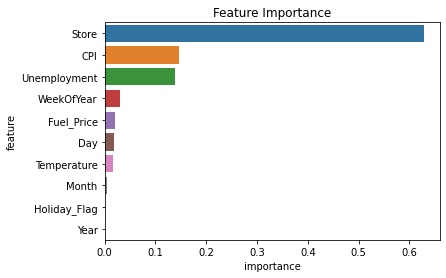

In [282]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Random Forest

<img src="https://www.researchgate.net/publication/351558381/figure/fig1/AS:1024758707666945@1621332923389/Typical-representation-of-a-random-forest-regressor.png" height=500 width=500>

#### Advantages of Random Forest

Random Forest is a popular ensemble learning method in machine learning that builds multiple decision trees and merges them together to get a more accurate and stable prediction. Here are some advantages of using Random Forest:

1. **High Accuracy:**
   - Random Forest generally provides high accuracy compared to individual decision trees. The ensemble of trees helps to reduce overfitting and variance, leading to a more robust model.

2. **Reduced Overfitting:**
   - By aggregating the predictions from multiple trees, Random Forest mitigates overfitting, which is a common issue with individual decision trees. The averaging or voting process helps create a more generalized model.

3. **Implicit Feature Selection:**
   - Random Forest naturally performs feature selection by considering different subsets of features for each tree. This can be beneficial when dealing with high-dimensional data, as irrelevant or less important features are less likely to be consistently selected across all trees.

4. **Handles Missing Values:**
   - Random Forest can handle missing values in the dataset. It imputes missing values during the training process, and this can be advantageous when working with real-world datasets that may have incomplete information.

5. **Robust to Outliers:**
   - Random Forest is less sensitive to outliers in the data. Since it aggregates predictions from multiple trees, extreme values in one tree are likely to be compensated by the other trees.

6. **Efficient on Large Datasets:**
   - Random Forest can efficiently handle large datasets with many features and observations. The parallelization of tree building across multiple processors or cores contributes to its scalability.

7. **Stability:**
   - The randomness introduced during the training process and the combination of multiple trees make Random Forest stable and less prone to small variations in the training data.

8. **No Need for Feature Scaling:**
    - Random Forest does not require feature scaling (e.g., normalization or standardization) because it operates based on decision tree splits, which are insensitive to the scale of features.

While Random Forest has these advantages, it's important to note that no algorithm is universally superior. The choice of the algorithm depends on the specific characteristics of the data and the goals of the machine learning task.

In [284]:
from sklearn.ensemble import RandomForestRegressor

In [285]:
model = RandomForestRegressor()

In [286]:
model.fit(train_inputs[numerics],train_target)

RandomForestRegressor()

In [289]:
train_preds = model.predict(train_inputs[numerics])
val_preds = model.predict(val_inputs[numerics])

In [288]:
?RandomForestRegressor

### Evaluate the Model

In [290]:
mse(train_target, train_preds,squared=False)

45986.039429493445

In [291]:
mse(val_target, val_preds,squared=False)

128865.20650166352

In [292]:
val_df[target].describe()

count    1.287000e+03
mean     1.038830e+06
std      5.586232e+05
min      2.099862e+05
25%      5.502007e+05
50%      9.635163e+05
75%      1.407545e+06
max      3.595903e+06
Name: Weekly_Sales, dtype: float64

In [293]:
model.feature_importances_

array([0.65817685, 0.00252353, 0.01241109, 0.01083732, 0.16209413,
       0.10455791, 0.01242758, 0.00264973, 0.00100943, 0.03331242])

In [294]:
importance_df = pd.DataFrame({
    'feature': train_inputs[numerics].columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [295]:
importance_df.head(10)

,feature,importance
0,Store,0.658177
4,CPI,0.162094
5,Unemployment,0.104558
9,WeekOfYear,0.033312
6,Day,0.012428
2,Temperature,0.012411
3,Fuel_Price,0.010837
7,Month,0.002650
1,Holiday_Flag,0.002524
8,Year,0.001009


In [296]:
import seaborn as sns

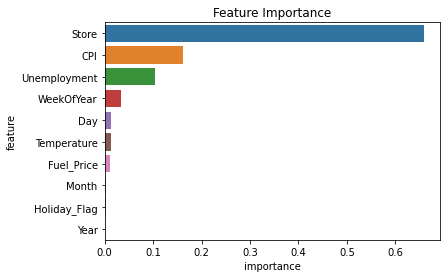

In [297]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning

#### Max Depth

In [373]:
model = RandomForestRegressor(n_estimators=150,max_depth=75 , random_state=40)

In [374]:
model.fit(train_inputs[numerics],train_target)

RandomForestRegressor(max_depth=75, n_estimators=150, random_state=40)

In [375]:
train_preds = model.predict(train_inputs[numerics])
val_preds = model.predict(val_inputs[numerics])

In [376]:
mse(train_target, train_preds,squared=False)

45817.30458594663

In [377]:
mse(val_target, val_preds,squared=False)

129046.48472547256

#### Max Leaf Nodes

In [519]:
model = RandomForestRegressor(n_estimators=150,max_depth=75,random_state=40)

In [520]:
#?RandomForestRegressor

In [521]:
model.fit(train_inputs[numerics],train_target)

RandomForestRegressor(max_depth=75, n_estimators=150, random_state=40)

In [522]:
train_preds = model.predict(train_inputs[numerics])
val_preds = model.predict(val_inputs[numerics])

In [523]:
mse(train_target, train_preds,squared=False)

45817.30458594663

In [524]:
mse(val_target, val_preds,squared=False)

129046.48472547256

In [476]:
df.Weekly_Sales.describe()

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

### K-fold Cross Validation

In [ ]:
train, val & test

In [ ]:
train - data, val - data - sample - 80 rows - 56, 78,96,32,45,...80


20 - 55, 77, 33,..20 rows


train - 55, 77, 33, 20....80 rows

val - 56, 78, 96,...

In [ ]:
train - kfoldcv - randomly split one

In [ ]:
80% - train - 60 train, 20 - val

20 - test

In [199]:
# Reorder columns in both DataFrames
train_inputs = train_inputs[numerics]
val_inputs = val_inputs[numerics]

# Concatenate DataFrames
combined_inputs = pd.concat([train_inputs, val_inputs], axis=0, ignore_index=True)

In [200]:
combined_outputs = pd.concat([train_target, val_target], axis=0, ignore_index=True)

In [201]:
combined_outputs

0       1120259.71
1        968896.68
2       2031852.16
3        520846.68
4       2028587.24
           ...    
5143     923344.54
5144    1396322.19
5145    1837457.69
5146    1365552.28
5147     597667.21
Name: Weekly_Sales, Length: 5148, dtype: float64

In [525]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Assuming 'X' is your feature matrix and 'y' is your target variable for regression
kf = KFold(n_splits=5,shuffle=True,random_state=30)


mse_scores = cross_val_score(model, combined_inputs, combined_outputs, cv=kf, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive (for better interpretation)
rmse_scores = np.sqrt(-mse_scores)

# Print the cross-validation scores
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

Cross-Validation RMSE Scores: [126479.23008102 134202.9399121  122051.77689497 119435.23962515
 111836.00328503]
Mean RMSE: 122801.0379596537


In [526]:
test_preds = model.predict(test_inputs[numerics])

In [527]:
mse(test_target, test_preds,squared=False)

131855.48644975235

In [528]:
from sklearn.tree import plot_tree, export_text

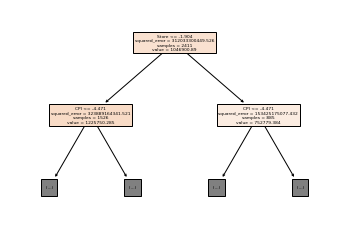

In [540]:
plot_tree(model[100], feature_names=train_inputs[numerics].columns, max_depth=1, filled=True);

### Saving and Loading Trained Models

In [533]:
import joblib

In [534]:
data = {
    'model': model,
    'scaler': scaler,
    'input_cols': inputs,
    'target_col': target,
    'numeric_cols': numerics
}

In [535]:
joblib.dump(data, 'rf_reg_walmart_sales.joblib')

['rf_reg_walmart_sales.joblib']

In [536]:
walmart_sales_rf_reg = joblib.load('rf_reg_walmart_sales.joblib')

In [537]:
test_preds2 = walmart_sales_rf_reg['model'].predict(test_inputs[numerics])
mse(test_target, test_preds2,squared=False)

131855.48644975235